In [46]:
import pandas as pd

df = pd.read_csv('FullData.csv')
df.columns = df.columns.str.strip()
df = df.drop(columns=['Others','Family.History', 'CO', 'Diagnosis', 'Life.Style', 'Sleep', 'Category', 'Age.Group'])


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop('Mortality', axis=1)
y = df['Mortality']

categorical_columns = X.select_dtypes(include=['object']).columns

onehot_encoder = OneHotEncoder()
X_encoded = onehot_encoder.fit_transform(X[categorical_columns])

X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(categorical_columns))

X_final = pd.concat([X.drop(categorical_columns, axis=1), X_encoded_df], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=75)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=75)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

Testing Accuracy: 0.9459459459459459
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.75      0.86        16

    accuracy                           0.95        74
   macro avg       0.97      0.88      0.91        74
weighted avg       0.95      0.95      0.94        74

Confusion Matrix:
[[58  0]
 [ 4 12]]


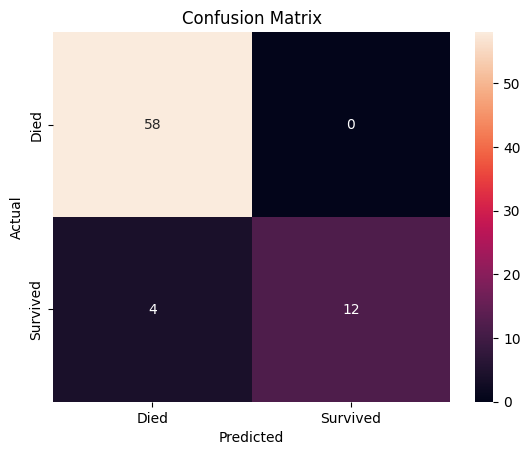

Top 10 Important Features of Random Forest:
       Feature  Importance
0          Age    0.108286
28        chol    0.069292
27    trestbps    0.057501
31     thalach    0.056417
35          ca    0.050231
40   Follow.Up    0.037011
33     oldpeak    0.033129
16  Hemoglobin    0.029819
2     Diabetes    0.029698
6       B.Urea    0.022444


In [48]:

print("Testing Accuracy:", rf_classifier.score(X_test, y_test))


print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, 
            xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

feature_importances = rf_classifier.feature_importances_
feature_names = X_final.columns
important_features = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
important_features = important_features.sort_values('Importance', ascending=False)

print("Top 10 Important Features of Random Forest:")
print(important_features.head(10))